In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

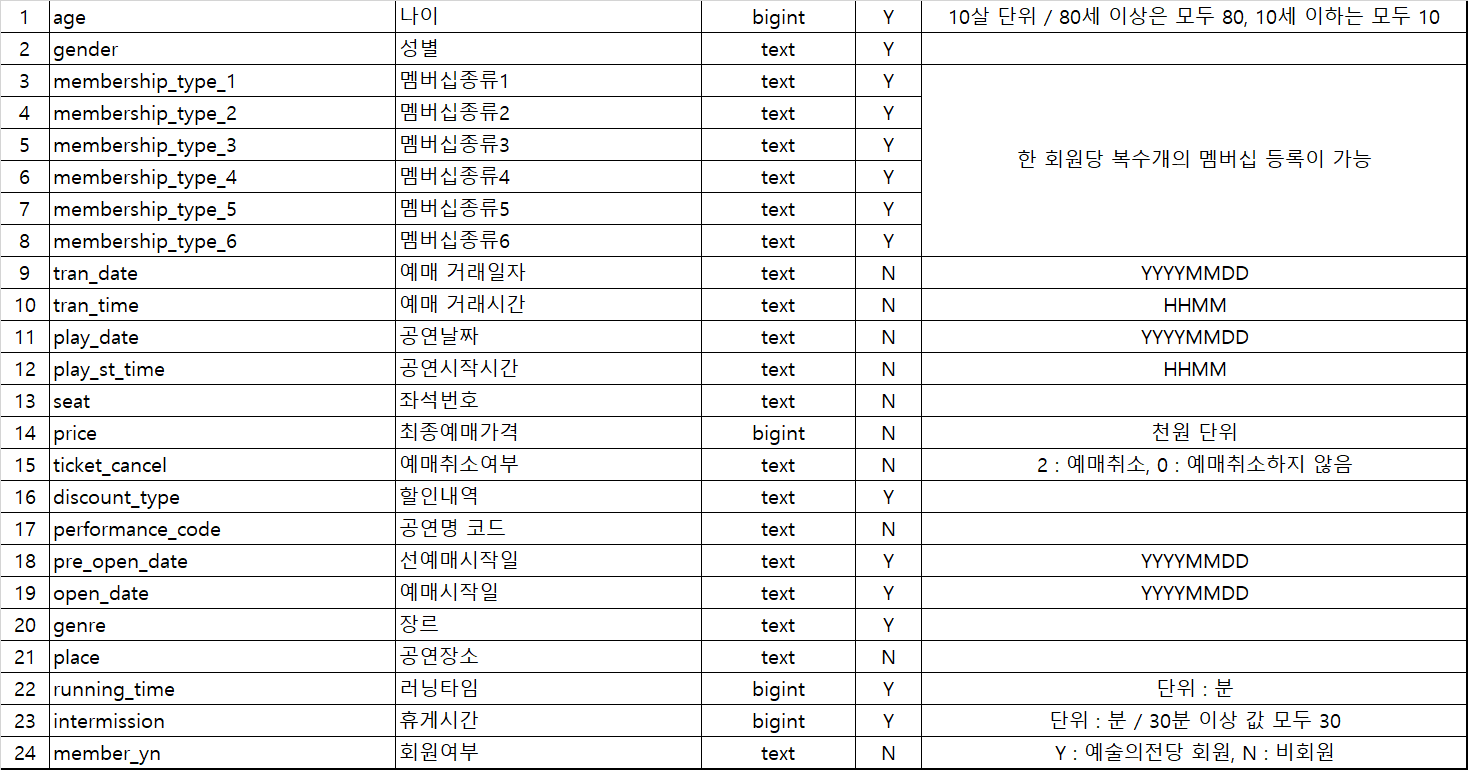

## 1. 파일 전처리

In [2]:
df = pd.read_csv('../files/seoul_art_center.csv', encoding='cp949')
df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [3]:
filt = df['place'].str.contains('콘서트홀')
df = df[filt]

In [4]:
df = df.drop(df.columns[:8], axis=1)

In [5]:
df.head()

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,20191020,1459,20191109,1700,3층 E블록4열 8,0,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,20190613,954,20190723,2000,2층 D블록8열 4,0,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096968 entries, 0 to 1920864
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   tran_date         1096968 non-null  int64  
 1   tran_time         1096968 non-null  int64  
 2   play_date         1096968 non-null  int64  
 3   play_st_time      1096968 non-null  int64  
 4   seat              1096968 non-null  object 
 5   price             1096968 non-null  int64  
 6   ticket_cancel     1096968 non-null  int64  
 7   discount_type     1096968 non-null  object 
 8   performance_code  1096968 non-null  int64  
 9   pre_open_date     701323 non-null   float64
 10  open_date         1096968 non-null  float64
 11  genre             1071895 non-null  object 
 12  place             1096968 non-null  object 
 13  running_time      1096968 non-null  int64  
 14  intermission      1096968 non-null  int64  
 15  member_yn         1096968 non-null  object 
dtype

In [7]:
df.genre.unique()

array(['교향곡', '독주', '클래식', '오페라', '합창', '성악', '실내악', '콘서트', nan, '복합장르',
       '기타', '재즈', '크로스오버', '가족극'], dtype=object)

    - 결측치 처리

In [8]:
# 장르가 nan값인 performance_code의 리스트
nan_df = df[df['genre'].isna()]
nan_list = nan_df['performance_code'].unique()
nan_list

array([ 229, 2818,  352, 1221, 2816, 2819,  988, 2215,  588,  852, 2937,
        354, 2472], dtype=int64)

In [9]:
# nan 되어있는 공연들 장르 채워주기
for n in nan_list:
    if n not in [229,2215]:
        df.loc[df['performance_code'] == n, 'genre'] = df.loc[df['performance_code'] == n, 'genre'].fillna('기타')
df.loc[df['performance_code'] == 229, 'genre'] = df.loc[df['performance_code'] == 229, 'genre'].fillna('교향곡')
df.loc[df['performance_code'] == 2215, 'genre'] = df.loc[df['performance_code'] == 2215, 'genre'].fillna('클래식')

# 삭제데이터 확인
nan_df = df[df['genre'].isna()]
nan_df

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn


In [10]:
genre = df.genre.unique()
genre

array(['교향곡', '독주', '클래식', '오페라', '합창', '성악', '실내악', '콘서트', '복합장르', '기타',
       '재즈', '크로스오버', '가족극'], dtype=object)

In [11]:
# 전체 초대권 갯수
total = df[df['discount_type'] == '초대권']['discount_type'].count()
print('전체 초대권 갯수 :', total)

# 장르별 초대권 갯수
numbers = []
for gen in genre:
    cond1 = df['genre'] == gen
    cond2 = df['discount_type'] == '초대권' 
    numbers.append(df[cond1 & cond2]['discount_type'].count())
print('장르별 초대권 갯수 :', numbers)

전체 초대권 갯수 : 388826
장르별 초대권 갯수 : [178040, 5664, 100766, 12213, 44886, 9614, 13600, 12724, 2322, 8185, 57, 674, 81]


In [12]:
# 장르별 초대권 비율
ratio = [round((num/total)*100, 2) for num in numbers]

for i in range(13):
    print(f'{genre[i]} : {ratio[i]} %')

교향곡 : 45.79 %
독주 : 1.46 %
클래식 : 25.92 %
오페라 : 3.14 %
합창 : 11.54 %
성악 : 2.47 %
실내악 : 3.5 %
콘서트 : 3.27 %
복합장르 : 0.6 %
기타 : 2.11 %
재즈 : 0.01 %
크로스오버 : 0.17 %
가족극 : 0.02 %


In [13]:
df.seat.str.split(" ")
df['floor'] = df.seat.str.split(" ").str[0]
df['area'] = df.seat.str.split(" ").str[1]
df['seat_num'] = df.seat.str.split(" ").str[2]

    - 이상치 처리

In [14]:
# 선예매일자가 예매일자보다 느린 이상치 바꿔주기
df_err = df[df['pre_open_date'] > df['open_date']].copy()
df_err['pre_open_date'], df_err['open_date'] = df_err['open_date'], df_err['pre_open_date']
df.loc[df_err.index, ['pre_open_date', 'open_date']] = df_err[['pre_open_date', 'open_date']]

df_err = df[df['pre_open_date'] == df['open_date']].copy()
df_err['pre_open_date'] = np.NaN
df.loc[df_err.index, ['pre_open_date']] = df_err['pre_open_date']

# 이상치 제거 확인
df[df['pre_open_date'] >= df['open_date']]

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn,floor,area,seat_num


In [15]:
df['tran_date'] = pd.to_datetime(df['tran_date'], format='%Y%m%d')
df['play_date'] = pd.to_datetime(df['play_date'], format='%Y%m%d')
df['pre_open_date'] = pd.to_datetime(df['pre_open_date'], format='%Y%m%d')
df['open_date'] = pd.to_datetime(df['open_date'], format='%Y%m%d')

df.head(2)

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn,floor,area,seat_num
0,2022-01-14,1512,2022-02-04,2000,3층 BOX9 10,10000,2,일반,302,2022-01-14,2022-01-15,교향곡,콘서트홀,120,15,Y,3층,BOX9,10
4,2022-02-06,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,897,2022-01-09,2022-01-10,독주,콘서트홀,90,0,Y,1층,B블록12열,7


In [16]:
# pre_open_date이 NaT인지 확인
is_nat = df["pre_open_date"].isna()

# 예매 거래일자와 예매 오픈일자의 차이를 이용해서 pop(인기도) 컬럼 생성
df["pop"] = np.where(is_nat, df["tran_date"] - df["open_date"], df["tran_date"] - df["pre_open_date"])
df['pop'] = df['pop'].dt.days
df['pop'] = df['pop'].apply(lambda x: 1 if x<=2 else 2)

# 취소표가 있는 인덱스 삭제
df[df.ticket_cancel > 0].index
df.drop(df[df.ticket_cancel > 0].index, axis=0, inplace=True)

In [17]:
df['pop'].unique()

array([2, 1], dtype=int64)

In [18]:
# 필요한 컬럼만 추출
df.drop(df.columns[[1,3,4,6,12,14,15]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864120 entries, 4 to 1920864
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   tran_date         864120 non-null  datetime64[ns]
 1   play_date         864120 non-null  datetime64[ns]
 2   price             864120 non-null  int64         
 3   discount_type     864120 non-null  object        
 4   performance_code  864120 non-null  int64         
 5   pre_open_date     406688 non-null  datetime64[ns]
 6   open_date         864120 non-null  datetime64[ns]
 7   genre             864120 non-null  object        
 8   running_time      864120 non-null  int64         
 9   floor             864120 non-null  object        
 10  area              864120 non-null  object        
 11  seat_num          864120 non-null  object        
 12  pop               864120 non-null  int64         
dtypes: datetime64[ns](4), int64(4), object(5)
memory usage: 92

In [19]:
# 가격 0이 아닌 데이터만 추출
filt = df['price']!=0
df = df[filt]
df

,tran_date,play_date,price,discount_type,performance_code,pre_open_date,open_date,genre,running_time,floor,area,seat_num,pop
4,2022-02-06,2022-03-02,180000,일반,897,2022-01-09,2022-01-10,독주,90,1층,B블록12열,7,2
9,2019-07-03,2019-07-21,75000,일반,1528,NaT,2019-04-13,클래식,100,1층,C블록17열,3,2
11,2019-10-05,2019-12-01,24000,K-lang 멤버십 회원(1인2매)20%,315,NaT,2019-10-05,오페라,120,3층,BOX9,5,1
16,2023-02-24,2023-04-12,130000,일반,1684,2023-02-18,2023-02-19,합창,100,1층,C블록2열,2,2
18,2019-12-20,2020-02-11,42000,골드회원 할인30%,76,2019-12-20,2019-12-23,클래식,120,2층,BOX2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920834,2019-12-06,2019-12-22,40000,싹딜가(그린)50%,1170,2019-11-01,2019-11-04,교향곡,120,2층,A블록5열,5,2
1920843,2018-12-23,2019-05-31,10000,일반,282,NaT,2018-12-02,교향곡,120,3층,N블록1열,8,2
1920849,2023-05-16,2023-06-03,40000,일반,1666,2023-03-17,2023-03-18,실내악,85,3층,D블록6열,6,2
1920855,2023-05-22,2023-06-13,10000,일반,2825,2023-05-05,2023-05-07,교향곡,120,3층,A블록6열,4,2


In [20]:
genrelist = list(df.genre.unique())

genre_dict = {'독주':'solo','교향곡':'symphony','클래식':'classic','오페라':'opera','합창':'chorus','성악':'vocal','실내악':'chamber','콘서트':'concert','복합장르':'flex','기타':'etc',
'크로스오버':'crossover','재즈':'jazz','가족극':'family'}

genre_df_list=[]

for k, v in genre_dict.items():
   genre_df = v+'_df'
   genre_df_list.append(genre_df)

In [21]:
for i in range(len(genre_df_list)):
    globals()[genre_df_list[i]] = i

solo_df

0

In [22]:
list(genre_dict.keys())

['독주',
 '교향곡',
 '클래식',
 '오페라',
 '합창',
 '성악',
 '실내악',
 '콘서트',
 '복합장르',
 '기타',
 '크로스오버',
 '재즈',
 '가족극']

In [23]:
for i in range(len(genre_df_list)):
    globals()[genre_df_list[i]] = df[df.genre==list(genre_dict.keys())[i]]

solo_df.head()

,tran_date,play_date,price,discount_type,performance_code,pre_open_date,open_date,genre,running_time,floor,area,seat_num,pop
4,2022-02-06,2022-03-02,180000,일반,897,2022-01-09,2022-01-10,독주,90,1층,B블록12열,7,2
199,2022-11-18,2023-02-25,123000,그린회원 할인5%,834,2022-11-18,2022-11-19,독주,120,1층,C블록4열,10,1
452,2022-05-27,2022-08-28,72000,골드회원 할인10%,837,2022-05-27,2022-05-28,독주,100,1층,A블록22열,1,1
483,2023-02-05,2023-06-07,152000,그린회원 할인5%,2938,2023-02-05,2023-02-06,독주,85,1층,B블록14열,10,1
503,2022-08-11,2022-10-23,60000,일반,1412,2022-07-30,2022-07-31,독주,100,2층,A블록4열,3,2


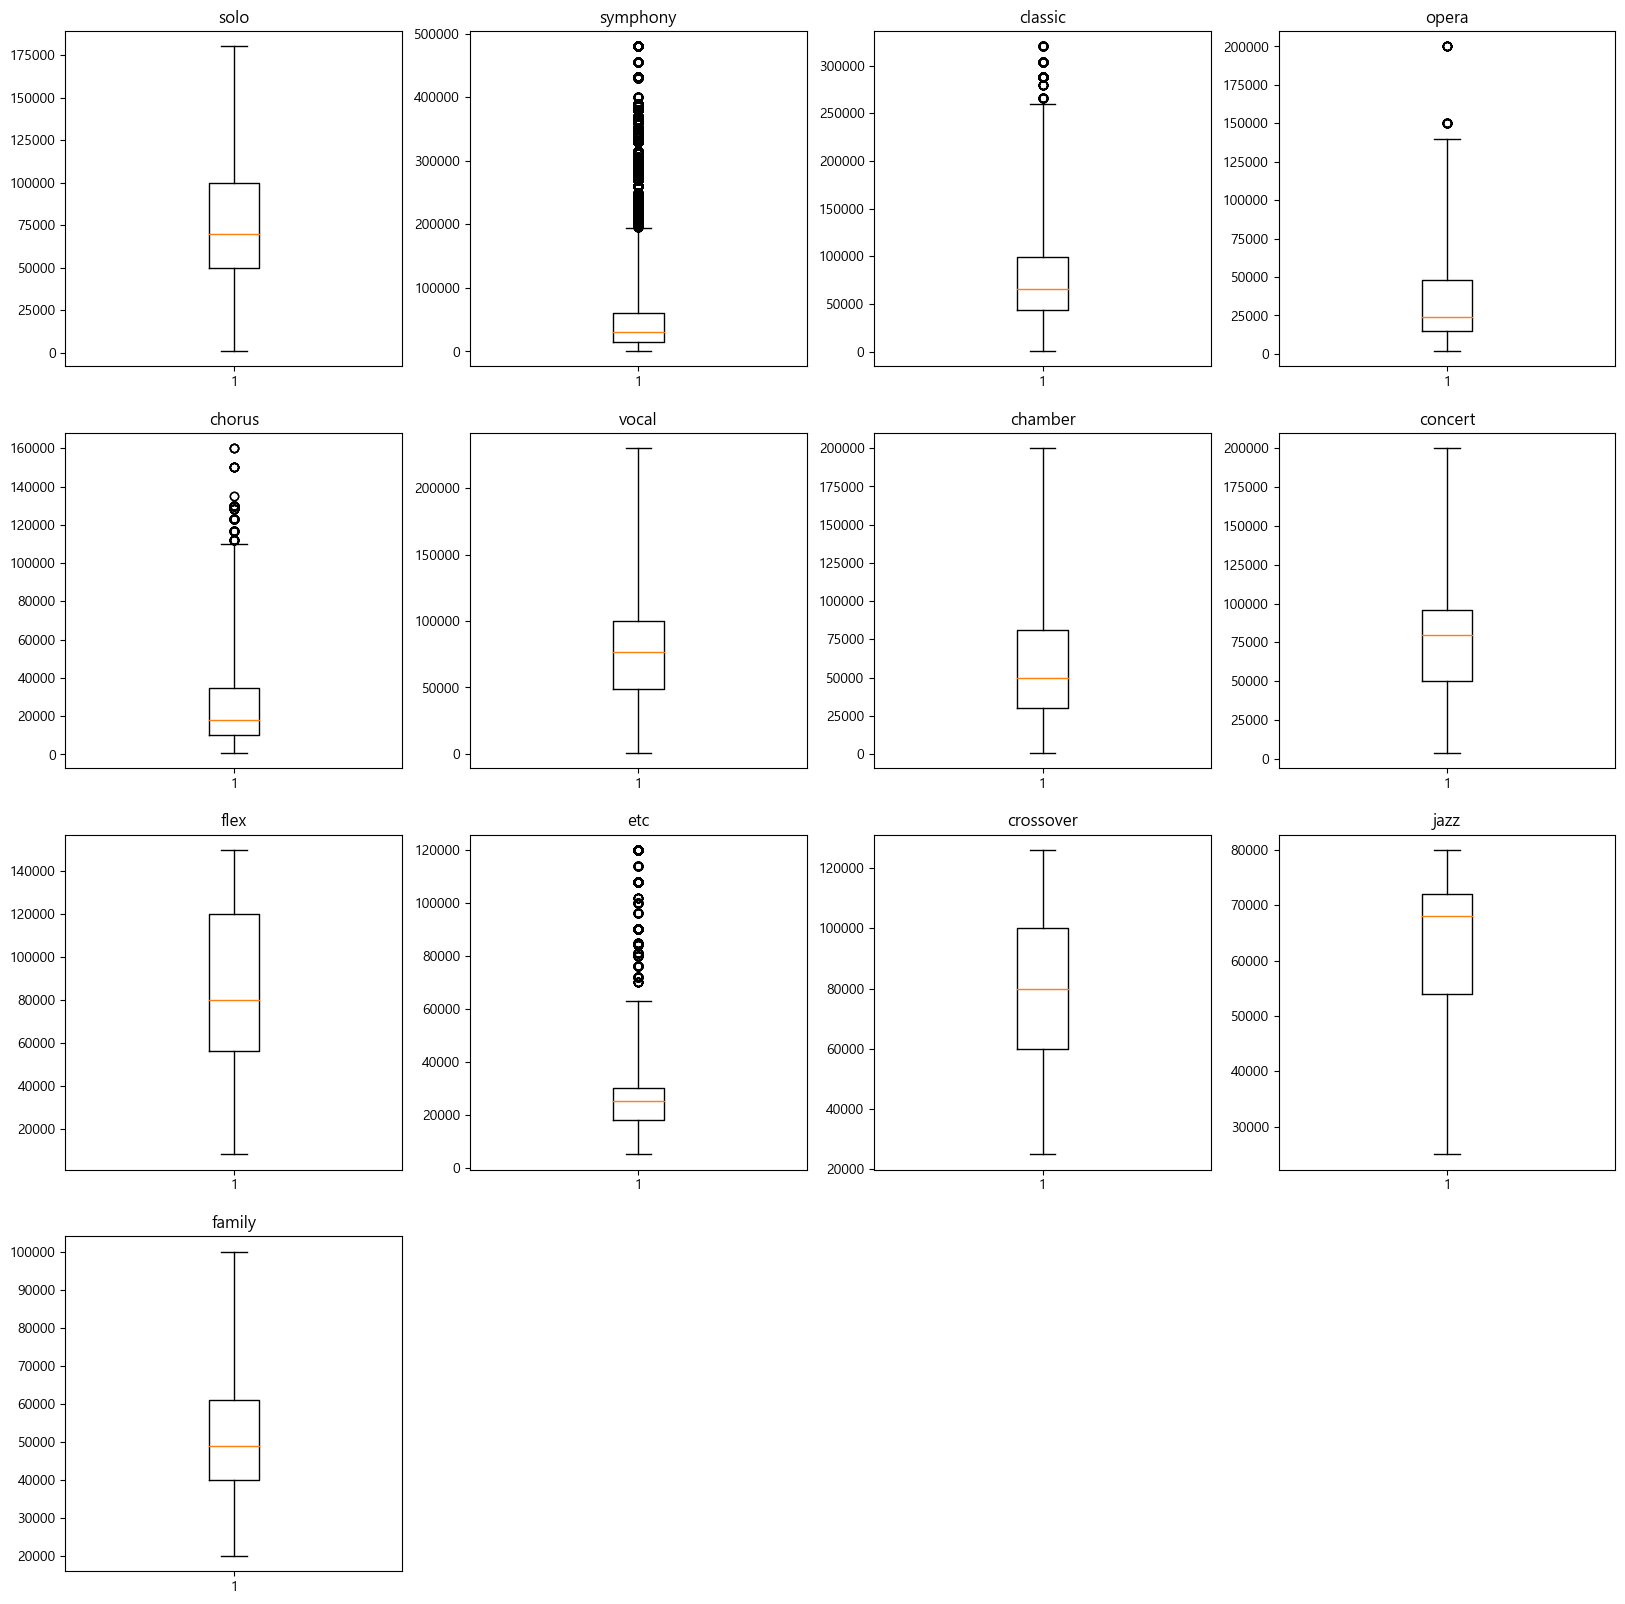

In [24]:
# boxplot으로 이상치 확인
plt.figure(figsize=(20, 20))
for i in range(len(genre_df_list)):
    plt.subplot(4, 4, i+1)
    plt.title(list(genre_dict.values())[i])
    globals()[f'{genre_df_list[i]}_'] = plt.boxplot(globals()[genre_df_list[i]].price, whis=3)

# plt.boxplot(solo_df.price, whis=3)

In [25]:
genre_df_list

['solo_df',
 'symphony_df',
 'classic_df',
 'opera_df',
 'chorus_df',
 'vocal_df',
 'chamber_df',
 'concert_df',
 'flex_df',
 'etc_df',
 'crossover_df',
 'jazz_df',
 'family_df']

In [26]:
# 이상치 있는 것들 제거하기
# 교향곡, 클래식, 오페라, 합창, 기타
# 1, 2, 3, 4, 9

unique_nums=[]
for i in range(len(genre_df_list)):
    if len(globals()[f'{genre_df_list[i]}_']['fliers'][0].get_data()[1]):
        unique_nums.append(list(set(globals()[f'{genre_df_list[i]}_']['fliers'][0].get_data()[1])))

In [27]:
symphony_min = min(unique_nums[0])
classic_min = min(unique_nums[1])
opera_min = min(unique_nums[2])
chorus_min = min(unique_nums[3])
etc_min = min(unique_nums[4])

In [28]:
# 이상치 제거 완료
symphony_df = symphony_df[symphony_df.price > symphony_min]
classic_df = classic_df[classic_df.price > classic_min]
opera_df = opera_df[opera_df.price > opera_min]
chorus_df = chorus_df[chorus_df.price > chorus_min]
etc_df = etc_df[etc_df.price > etc_min]

In [29]:
# 하나로 합치기
df = pd.concat([solo_df, symphony_df, classic_df, opera_df, chorus_df, vocal_df, chamber_df, concert_df, flex_df, etc_df, crossover_df, jazz_df, family_df])

    - 중복값 제거

In [30]:
# 모든 열의 값이 동일한 중복 행 확인
duplicates = df.duplicated()  # keep='first'

# 중복된 행들의 인덱스 출력
duplicate_indices = df[duplicates].index.tolist()

# 인덱스 정렬 후 출력
sorted_duplicate_indices = sorted(duplicate_indices)
print(sorted_duplicate_indices)

# -------------------------------------------------------

# 모든 열의 값이 동일한 모든 중복 행 확인 (첫 번째 포함)
duplicates_all = df.duplicated(keep=False)

# 모든 중복된 행들의 인덱스 출력 및 정렬 후 출력
duplicate_all_indices = sorted(df[duplicates_all].index.tolist())
len(duplicate_all_indices)

df.loc[duplicate_all_indices].sort_values(by='performance_code')

# -------------------------------------------------------

# 중복행 제거
df.drop_duplicates(inplace=True)

[106671, 219613, 252250, 254272, 279269, 279503, 280181, 280463, 379384, 418512, 441313, 457193, 459088, 463926, 470280, 481833, 485678, 496710, 501326, 526343, 537917, 539443, 545763, 549002, 555840, 570625, 582729, 593003, 603074, 611455, 612796, 618704, 620319, 624926, 627821, 630784, 632717, 650234, 656725, 657787, 687356, 699806, 701784, 708257, 708583, 721748, 735972, 775436, 780797, 781609, 783020, 786250, 788698, 809380, 810731, 833038, 839718, 845290, 870805, 870807, 878677, 879754, 880307, 881572, 894076, 895149, 898756, 904333, 906242, 906835, 907314, 931824, 945395, 946108, 952439, 953257, 955098, 958641, 959034, 965636, 966006, 987497, 1003671, 1007657, 1014905, 1023438, 1024773, 1033870, 1035356, 1037181, 1054394, 1059546, 1060337, 1061405, 1065233, 1069685, 1075198, 1078827, 1079159, 1086410, 1090134, 1110751, 1123158, 1131197, 1141396, 1147491, 1151713, 1158445, 1176446, 1182402, 1213095, 1213141, 1214022, 1219933, 1220257, 1225588, 1228850, 1238798, 1240410, 1243091, 1

In [31]:
df.reset_index(drop=True, inplace=True)
df.head()

,tran_date,play_date,price,discount_type,performance_code,pre_open_date,open_date,genre,running_time,floor,area,seat_num,pop
0,2022-02-06,2022-03-02,180000,일반,897,2022-01-09,2022-01-10,독주,90,1층,B블록12열,7,2
1,2022-11-18,2023-02-25,123000,그린회원 할인5%,834,2022-11-18,2022-11-19,독주,120,1층,C블록4열,10,1
2,2022-05-27,2022-08-28,72000,골드회원 할인10%,837,2022-05-27,2022-05-28,독주,100,1층,A블록22열,1,1
3,2023-02-05,2023-06-07,152000,그린회원 할인5%,2938,2023-02-05,2023-02-06,독주,85,1층,B블록14열,10,1
4,2022-08-11,2022-10-23,60000,일반,1412,2022-07-30,2022-07-31,독주,100,2층,A블록4열,3,2


In [32]:
# area 컬럼을 2개의 새로운 컬럼으로 나누기
df[['area_block', 'area_column']] = df['area'].str.extract(r'(\D+)(\d+)')

In [33]:
df.area_column = df.area_column.astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64875 entries, 0 to 64874
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tran_date         64875 non-null  datetime64[ns]
 1   play_date         64875 non-null  datetime64[ns]
 2   price             64875 non-null  int64         
 3   discount_type     64875 non-null  object        
 4   performance_code  64875 non-null  int64         
 5   pre_open_date     45453 non-null  datetime64[ns]
 6   open_date         64875 non-null  datetime64[ns]
 7   genre             64875 non-null  object        
 8   running_time      64875 non-null  int64         
 9   floor             64875 non-null  object        
 10  area              64875 non-null  object        
 11  seat_num          64875 non-null  object        
 12  pop               64875 non-null  int64         
 13  area_block        64875 non-null  object        
 14  area_column       6487

In [35]:
def set_seat(row): #조건에 맞는 좌석 등급 설정.
    if row['floor'] == "1층" and row['area_block'] in ['C블록', 'B블록', 'D블록'] and 1 <= row['area_column'] <= 20:
        return 'R석'
    elif row['floor'] == "2층" and row['area_block'] in ['B블록', 'C블록', 'D블록'] and 1 <= row['area_column'] <= 3:
        return 'R석'
    elif row['floor'] == "1층" and (row['area_block'] in ['A블록', 'E블록']) and 1 <= row['area_column'] <= 22:
        return 'S석'
    elif row['floor'] == "1층" and row['area_block'] in ['C블록', 'B블록', 'D블록'] and 21 <= row['area_column'] <= 22:
        return 'S석'
    elif row['floor'] == "2층" and row['area_block'] in ['C블록', 'B블록', 'D블록'] and 4 <= row['area_column'] <= 6:
        return 'S석'
    elif row['floor'] == "2층" and (row['area_block'] in ['A블록', 'E블록']) and 1 <= row['area_column'] <= 3:
        return 'S석'
    elif row['floor'] == "2층" and (row['area_block'] in ['A블록', 'E블록']) and 4 <= row['area_column'] <= 7:
        return 'A석'
    elif row['floor'] == "2층" and (row['area_block'] in ['C블록', 'B블록', 'D블록']) and 7 <= row['area_column'] <= 8:
        return 'A석'
    elif row['floor'] == "3층" and (row['area_block'] in ['C블록', 'B블록', 'D블록','E블록','F블록']) and 4 <= row['area_column'] <= 7:
        return 'A석'
    elif row['floor'] == "2층" and (row['area_block'] in ['BOX']):
        return 'A석'
    elif row['floor'] == "3층" and (row['area_block'] in ['BOX']):
        return 'B석'
    else:
        return 'B석'

# apply 함수를 사용하여 "석" 칼럼 값 설정
df['SeatClass'] = df.apply(set_seat, axis=1)

# 결과 출력
df

,tran_date,play_date,price,discount_type,performance_code,pre_open_date,open_date,genre,running_time,floor,area,seat_num,pop,area_block,area_column,SeatClass
0,2022-02-06,2022-03-02,180000,일반,897,2022-01-09,2022-01-10,독주,90,1층,B블록12열,7,2,B블록,12,R석
1,2022-11-18,2023-02-25,123000,그린회원 할인5%,834,2022-11-18,2022-11-19,독주,120,1층,C블록4열,10,1,C블록,4,R석
2,2022-05-27,2022-08-28,72000,골드회원 할인10%,837,2022-05-27,2022-05-28,독주,100,1층,A블록22열,1,1,A블록,22,S석
3,2023-02-05,2023-06-07,152000,그린회원 할인5%,2938,2023-02-05,2023-02-06,독주,85,1층,B블록14열,10,1,B블록,14,R석
4,2022-08-11,2022-10-23,60000,일반,1412,2022-07-30,2022-07-31,독주,100,2층,A블록4열,3,2,A블록,4,A석
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64870,2021-04-18,2021-05-11,32000,그린회원 할인20%,1429,NaT,2021-04-16,가족극,110,3층,BOX7,6,1,BOX,7,B석
64871,2021-04-30,2021-05-11,42000,골드회원 할인30%,1429,NaT,2021-04-16,가족극,110,2층,D블록7열,13,2,D블록,7,A석
64872,2021-04-17,2021-05-11,50000,장애인/국가유공자 할인50%,1429,NaT,2021-04-16,가족극,110,1층,C블록22열,4,1,C블록,22,S석
64873,2021-05-02,2021-05-11,42000,골드회원 할인30%,1429,NaT,2021-04-16,가족극,110,2층,D블록6열,3,2,D블록,6,S석


In [36]:
# 장르와 좌석등급 컬럼을 인코딩하기
facto1 = pd.factorize(df.genre)[0]
facto2 = pd.factorize(df.SeatClass)[0]

df.insert(16, 'genre_encoded', facto1)
df.insert(17, 'SeatClass_encoded', facto2)

df.head()

,tran_date,play_date,price,discount_type,performance_code,pre_open_date,open_date,genre,running_time,floor,area,seat_num,pop,area_block,area_column,SeatClass,genre_encoded,SeatClass_encoded
0,2022-02-06,2022-03-02,180000,일반,897,2022-01-09,2022-01-10,독주,90,1층,B블록12열,7,2,B블록,12,R석,0,0
1,2022-11-18,2023-02-25,123000,그린회원 할인5%,834,2022-11-18,2022-11-19,독주,120,1층,C블록4열,10,1,C블록,4,R석,0,0
2,2022-05-27,2022-08-28,72000,골드회원 할인10%,837,2022-05-27,2022-05-28,독주,100,1층,A블록22열,1,1,A블록,22,S석,0,1
3,2023-02-05,2023-06-07,152000,그린회원 할인5%,2938,2023-02-05,2023-02-06,독주,85,1층,B블록14열,10,1,B블록,14,R석,0,0
4,2022-08-11,2022-10-23,60000,일반,1412,2022-07-30,2022-07-31,독주,100,2층,A블록4열,3,2,A블록,4,A석,0,2


In [37]:
# 중간파일 저장
df.to_csv('concert_hall_df.csv')

---

## 2. 베이스 모델

In [170]:
concertDF = pd.read_csv('./concert_hall_df.csv', index_col=0)
concertDF.head()

,tran_date,play_date,price,discount_type,performance_code,pre_open_date,open_date,genre,running_time,floor,area,seat_num,pop,area_block,area_column,SeatClass,genre_encoded,SeatClass_encoded
0,2022-02-06,2022-03-02,180000,일반,897,2022-01-09,2022-01-10,독주,90,1층,B블록12열,7,2,B블록,12,R석,0,0
1,2022-11-18,2023-02-25,123000,그린회원 할인5%,834,2022-11-18,2022-11-19,독주,120,1층,C블록4열,10,1,C블록,4,R석,0,0
2,2022-05-27,2022-08-28,72000,골드회원 할인10%,837,2022-05-27,2022-05-28,독주,100,1층,A블록22열,1,1,A블록,22,S석,0,1
3,2023-02-05,2023-06-07,152000,그린회원 할인5%,2938,2023-02-05,2023-02-06,독주,85,1층,B블록14열,10,1,B블록,14,R석,0,0
4,2022-08-11,2022-10-23,60000,일반,1412,2022-07-30,2022-07-31,독주,100,2층,A블록4열,3,2,A블록,4,A석,0,2


In [171]:
concertDF['SeatClass_encoded'].unique()

array([0, 1, 2, 3], dtype=int64)

In [172]:
concertDF = concertDF[['price', 'running_time', 'genre_encoded', 'SeatClass_encoded']]
concertDF.rename(columns={'running_time': '러닝타임', 'genre_encoded': '장르', 'SeatClass_encoded': '좌석등급'}, inplace=True)
concertDF.head()

,price,러닝타임,장르,좌석등급
0,180000,90,0,0
1,123000,120,0,0
2,72000,100,0,1
3,152000,85,0,0
4,60000,100,0,2


In [173]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(concertDF, 
                                         test_size=0.2, 
                                         random_state=0)

In [174]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='price', problem_type='regression', eval_metric='r2')
hyperparameters={'GBM': {}, 'CAT': {}, 'XGB': {}, 'RF': {}, 'XT': {}, 'KNN': {}, 'LR': {}}
predictor.fit(train_data=train_data, presets= 'medium_quality',hyperparameters=hyperparameters) 
results = predictor.fit_summary()
print(results)

No path specified. Models will be saved in: "AutogluonModels\ag-20230904_031335"
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230904_031335"
AutoGluon Version:  0.8.2
Python Version:     3.9.17
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   119.28 GB / 247.62 GB (48.2%)
Train Data Rows:    51900
Train Data Columns: 3
Label Column: price
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5399.99 MB
	Train Data (Original)  Memory Usage: 1.25 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Iden

[1000]	valid_set's l2: 1.03293e+09	valid_set's r2: 0.866325
[2000]	valid_set's l2: 1.03261e+09	valid_set's r2: 0.866366
[3000]	valid_set's l2: 1.03253e+09	valid_set's r2: 0.866376
[4000]	valid_set's l2: 1.03249e+09	valid_set's r2: 0.866381
[5000]	valid_set's l2: 1.03248e+09	valid_set's r2: 0.866382
[6000]	valid_set's l2: 1.03248e+09	valid_set's r2: 0.866383
[7000]	valid_set's l2: 1.03248e+09	valid_set's r2: 0.866382


	0.8664	 = Validation score   (r2)
	14.96s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: RandomForest ...
	0.8664	 = Validation score   (r2)
	0.85s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	0.8664	 = Validation score   (r2)
	144.27s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTrees ...
	0.8664	 = Validation score   (r2)
	0.64s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	0.8664	 = Validation score   (r2)
	1.06s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LinearModel ...
	0.2044	 = Validation score   (r2)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.8666	 = Validation score   (r2)
	0.23s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 163.34s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2   0.866625       0.421660  159.473766                0.000000           0.232252            2       True          8
1             LightGBM   0.866383       0.396629   14.959121                0.396629          14.959121            1       True          2
2             CatBoost   0.866382       0.008508  144.266209                0.008508         144.266209            1       True          4
3              XGBoost   0.866382       0.016044    1.059098                0.016044           1.059098            1       True          6
4           ExtraTrees   0.866373       0.032351    0.644568                0.032351           0.644568            1       True          5
5         RandomForest   0.866373       0.040591    0.850127                0.040591           0.850127 

In [175]:
ld_board = predictor.leaderboard(train_data, silent=True)
ld_board
# score_test : 테스트데이터에 대한 score
# score_val : 검증데이터에 대한 score

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.853017,0.866382,0.089079,0.008508,144.266209,0.089079,0.008508,144.266209,1,True,4
1,XGBoost,0.853016,0.866382,0.177151,0.016044,1.059098,0.177151,0.016044,1.059098,1,True,6
2,LightGBM,0.853016,0.866383,8.282839,0.396629,14.959121,8.282839,0.396629,14.959121,1,True,2
3,ExtraTrees,0.853016,0.866373,0.268266,0.032351,0.644568,0.268266,0.032351,0.644568,1,True,5
4,RandomForest,0.853015,0.866373,0.251599,0.040591,0.850127,0.251599,0.040591,0.850127,1,True,3
5,WeightedEnsemble_L2,0.852801,0.866625,8.666117,0.421660,159.473766,0.007999,0.000000,0.232252,2,True,8
6,KNeighbors,0.791822,0.812737,0.286200,0.016522,0.016184,0.286200,0.016522,0.016184,1,True,1
7,LinearModel,0.199585,0.204433,0.000000,0.000000,0.033387,0.000000,0.000000,0.033387,1,True,7


In [186]:
# best model 찾기
predictor.get_model_best()

'WeightedEnsemble_L2'

In [177]:
# 성능평가
predictor.evaluate(train_data)

Evaluation: r2 on test data: 0.8528009031879418
Evaluations on test data:
{
    "r2": 0.8528009031879418,
    "root_mean_squared_error": -33661.16327206634,
    "mean_squared_error": -1133073912.828708,
    "mean_absolute_error": -23355.76127118708,
    "pearsonr": 0.9235186813236845,
    "median_absolute_error": -15444.53515625
}


{'r2': 0.8528009031879418,
 'root_mean_squared_error': -33661.16327206634,
 'mean_squared_error': -1133073912.828708,
 'mean_absolute_error': -23355.76127118708,
 'pearsonr': 0.9235186813236845,
 'median_absolute_error': -15444.53515625}

In [178]:
# 중요 피쳐 추출
importance_df = predictor.feature_importance(train_data)
print(importance_df)

Computing feature importance via permutation shuffling for 3 features using 5000 rows with 5 shuffle sets...
	19.56s	= Expected runtime (3.91s per shuffle set)
	18.46s	= Actual runtime (Completed 5 of 5 shuffle sets)


      importance    stddev       p_value  n  p99_high   p99_low
장르      1.312295  0.028305  2.595481e-08  5  1.370575  1.254015
좌석등급    0.162448  0.008946  1.099048e-06  5  0.180868  0.144029
러닝타임    0.081012  0.005577  2.678448e-06  5  0.092495  0.069529


In [179]:
running_time = int(input('예매하고 싶은 공연의 러닝타임을 입력하세요. : '))
genre_encoded = input('예매하고 싶은 공연의 장르를 입력하세요. \
(독주 : 0, 교향곡 : 1, 클래식 : 2, 오페라 : 3, 합창 : 4, \
성악 : 5, 실내악 : 6, 콘서트 : 7, 복합장르 : 8, \
기타 : 9, 크로스오버 : 10, 재즈 : 11, 가족극 : 12)')
SeatClass_encoded = input('예매하고 싶은 좌석등급을 입력하세요. (R석 : 0, S석 : 1, A석 : 2, B석 : 3)')

In [180]:
new_data = pd.DataFrame({'러닝타임': [running_time], '장르': [genre_encoded], '좌석등급': [SeatClass_encoded]}, index=[0])

In [181]:
new_data

,러닝타임,장르,좌석등급
0,90,3,0


In [182]:
pre_y = predictor.predict(new_data)

In [183]:
f'해당 공연의 가격은 {pre_y[0]:.0f}원 으로 예상됩니다.'

'해당 공연의 가격은 195003원 으로 예상됩니다.'